In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf 
import keras
import sklearn 
import os 

In [2]:
df = pd.read_csv(r"C:\Users\user\Documents\Health datasets\dementia-death-rates new.csv")

In [3]:
df

,Entity,Code,Year,Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,31.83
1,African Region (WHO),0,1990,23.04
2,Albania,ALB,1990,24.78
3,Algeria,DZA,1990,28.78
4,American Samoa,ASM,1990,24.21
...,...,...,...,...
6835,World Bank Lower Middle Income,0,2019,21.38
6836,World Bank Upper Middle Income,0,2019,23.33
6837,Yemen,YEM,2019,25.48
6838,Zambia,ZMB,2019,25.39


In [8]:
#rename column for simplicity 

df = df.rename(columns={'Deaths - Alzheimer\'s disease and other dementias - Sex: Both - Age: Age-standardized (Rate)': 'Death_Rate'})


In [9]:
df.columns 

Index(['Entity', 'Code', 'Year', 'Death_Rate'], dtype='object')

In [10]:
#convert year to int and death_rate to float if necessary 

df["Year"] = df["Year"].astype(int)

df["Death_Rate"] = df["Death_Rate"].astype(float)

In [11]:
df.head()

,Entity,Code,Year,Death_Rate
0,Afghanistan,AFG,1990,31.83
1,African Region (WHO),0,1990,23.04
2,Albania,ALB,1990,24.78
3,Algeria,DZA,1990,28.78
4,American Samoa,ASM,1990,24.21


In [12]:
#check missing values 

print(df.isnull().sum())

Entity        0
Code          0
Year          0
Death_Rate    0
dtype: int64


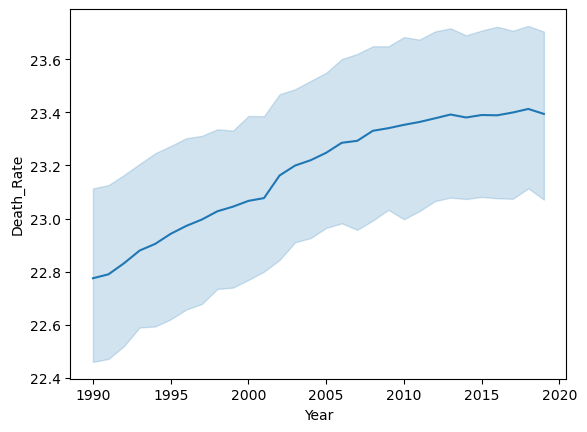

In [13]:
#Death Rate of all countries from 1990 to 2019

sns.lineplot(x="Year", y="Death_Rate", data=df)

plt.show()

<Axes: xlabel='Year'>

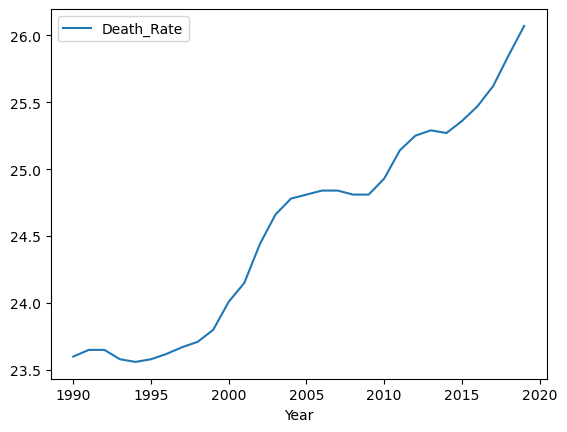

In [14]:
#death rate by specific country 

country = 'Kenya'

df[df['Entity'] == country].plot(x='Year', y='Death_Rate')

In [15]:
#ID the entity (country) associated with the highest death rate

df[df['Death_Rate'] == df['Death_Rate'].max()]

,Entity,Code,Year,Death_Rate
6713,Kiribati,KIR,2019,33.29


In [16]:
high_freq_code = df["Code"].value_counts().idxmax()
high_freq_entity = df[df["Code"] == high_freq_code]["Entity"].unique()

print(f"Entity with highest frequency: '{high_freq_code}' : '{high_freq_entity}'")

Entity with highest frequency: '0' : '['African Region (WHO)' 'East Asia & Pacific (WB)'
 'Eastern Mediterranean Region (WHO)' 'England'
 'Europe & Central Asia (WB)' 'European Region (WHO)' 'G20'
 'Latin America & Caribbean (WB)' 'Middle East & North Africa (WB)'
 'North America (WB)' 'Northern Ireland' 'OECD Countries'
 'Region of the Americas (WHO)' 'Scotland' 'South Asia (WB)'
 'South-East Asia Region (WHO)' 'Sub-Saharan Africa (WB)' 'Wales'
 'Western Pacific Region (WHO)' 'World Bank High Income'
 'World Bank Low Income' 'World Bank Lower Middle Income'
 'World Bank Upper Middle Income']'


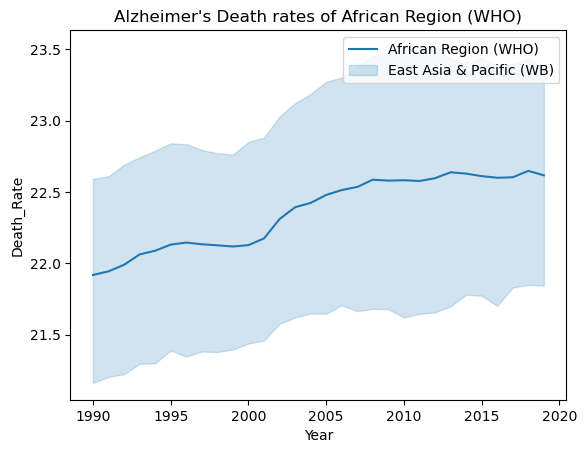

In [18]:
#plot trend for entity with highest frequency code

sns.lineplot(x="Year", y="Death_Rate", data=df[df["Code"] == high_freq_code])
plt.legend(high_freq_entity)
plt.title("Alzheimer's Death rates of " + high_freq_entity[0])
plt.show()


Gradual increase is noted in the AFrican region, from 1990, after 2010, it appears to stabilize 